# <center> Financial Risk Analysis in Python - Apple and S&P 500

#### the  Scenario:

ABC Company is about to buy shares of Apple and S&P 500 with the target to obtain optimum profit in the span of two years.
But they are curious how the two companies have been performing for three years.

So the manager approaches you as a Data Analyst in ABC company, please can we know how the Apple and S&P 500 stock market have been for the past
three years? We would like to know if the rusk is minimal or unaffordable for us.

this is a real scenario! 

https://www.youtube.com/watch?v=DBasmyYc-i4

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt 
import yfinance as yf
import pyfolio 
%matplotlib inline

c:\Users\ACER\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
c:\Users\ACER\anaconda3\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
symbol= "AAPL"
start_date="2020-01-01"
end_date="2023-12-31"
data= yf.download(symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059441,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349159,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200


In [5]:
# Percentage change
data["Returns"]=data["Adj Close"].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059441,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349159,146322800,-0.009722
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,0.007968
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,-0.004703
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200,0.016086


In [6]:
volatility = np.std(data["Returns"])
volatility

0.021135400815115543

In [7]:
market_data=yf.download("^GSPC",start=start_date,end=end_date)
market_data["Returns"]=market_data["Adj Close"].pct_change()
data=data.join(market_data["Adj Close"],on=data.index,rsuffix="_Market")
data["Returns_Market"]=data["Adj Close_Market"].pct_change()
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059441,135480400,NaN,3257.850098,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349159,146322800,-0.009722,3234.850098,-0.007060
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,0.007968,3246.280029,0.003533
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582664,108872000,-0.004703,3237.179932,-0.002803
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200,0.016086,3253.050049,0.004902


In [8]:
cov_matrix=np.cov(data["Returns"].dropna(),data["Returns_Market"].dropna())

beta=cov_matrix[0,1]/cov_matrix[1,1]
beta,cov_matrix

(1.1896771021714627,
 array([[0.00044715, 0.00025003],
        [0.00025003, 0.00021017]]))

In [9]:
sharper_ratio=data["Returns"].mean()/volatility
sharper_ratio

0.056141212826671866

In [10]:
data["Week Returns"]=data["Returns"].rolling(7).mean()
data["Monthly Returns"]=data["Returns"].rolling(30).mean()

#data.head(35)

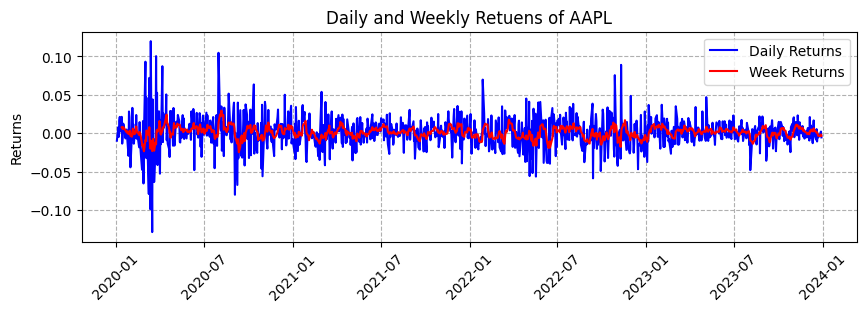

In [11]:
plt.figure(figsize=(10,6))

#Plotting Returns
plt.subplot(2,1,1)
plt.plot(data.index,data["Returns"],label="Daily Returns",color="blue")
plt.plot(data.index,data["Week Returns"],label="Week Returns",color="red")
plt.title("Daily and Weekly Retuens of {}".format(symbol))
plt.ylabel("Returns")
plt.grid(linestyle="--")
plt.xticks(rotation=45)
plt.legend()
plt.show()

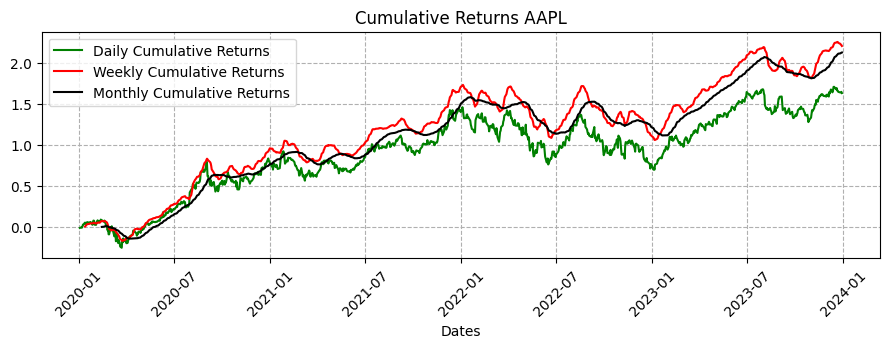

In [12]:
plt.figure(figsize=(9,6))
plt.subplot(2,1,2)
cumulative_returns=(1+data["Returns"]).cumprod()-1
cumulative_returns_w=(1+data["Week Returns"]).cumprod()-1
cumulative_returns_m=(1+data["Monthly Returns"]).cumprod()-1
plt.plot(data.index,cumulative_returns,label="Daily Cumulative Returns",color="green")
plt.plot(data.index,cumulative_returns_w,label="Weekly Cumulative Returns",color="red")
plt.plot(data.index,cumulative_returns_m,label="Monthly Cumulative Returns",color="black")
plt.title("Cumulative Returns {}".format(symbol))
plt.xlabel("Dates")
plt.legend()
plt.grid(linestyle="--")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Calculate VaR
VaR=np.percentile(data["Returns"].dropna(),5)

#calculate Alpha
model=np.polyfit(data["Returns_Market"].dropna(),data["Returns"].dropna(),1)
Alpha=model[1]

#Calculate treynor Ratio
risk_free_rate=0.02 #Assume a risk-free-rate
treynor_rate=(data["Returns"].mean()-risk_free_rate)/beta

#Calculate Maximum Drawdown
cumulative_returns=(1+data["Returns"]).cumprod()
peak= cumulative_returns.cummax()
drawdown=(cumulative_returns-peak)/peak
max_drawdown=abs(drawdown.min())

#Print
print("Volatiity : ",volatility)
print("Beta : ",beta)
print("Sharper Ratio : ",sharper_ratio)
#Print Additional Results
print("VaR at 95% confidence Level : ",VaR)
print("Alpha : ",Alpha)
print("Treynor Rate : ",treynor_rate)
print("Max Drawdown : ",max_drawdown)


Volatiity :  0.021135400815115543
Beta :  1.1896771021714627
Sharper Ratio :  0.056141212826671866
VaR at 95% confidence Level :  -0.03240582047303531
Alpha :  0.0006095816874464255
Treynor Rate :  -0.015813898519457335
Max Drawdown :  0.31427265792286996


# Notes
### <center> Financial Risk Analysis Insights
- <span style="color:blue">Volatility</span> (0.0211) : Indicates the degree of variation of a trading price series. A lower volatility suggests a more stable investment.
- <span style="color:blue">Beta</span> (1.1897) :Reflects the stock's sensitivity to market movement. A beta above 1 suggests the stock is more volatile then the market.
- <span style="color:blue">Sharpe Ratio</span> (0.0561) : Measures the risk-adjusted returns. A positive Sharpe ratio indicates a potentially favorable risk-return profile.
- <span style="color:blue">VaR at 95% Confidence Level</span> (-0.0324) : Represents the maximum expected loss with a 95% confidence. A negative value suggests a potential loss, emphasizing risk.
- <span style="color:blue">Alpha</span> (0.0006) : Indicates the excess return over the benchmark. Positive alpha implies the investment outperforms expectations.
- <span style="color:blue">Treynor Ratio</span> (-0.0158) : Measures the excess return per unit of systematic risk. A negative value may suggest an underperformance compared to the market.
- <span style="color:blue">Maximum Drawdown</span> (0.3143) : Represents the largest peak-to-trogh decline in the investment's value. A lower drawdown is generally prefered.

### <center> Advice to the Investors:
Considering the positive Sharpe ratio and Alpha, the investment shows potential for positive risk-adjisted returns. However the high volatility,beta and negative Treynor ratio indicates high risk and sensitivity to market movement. Investors should carefully assess their risk tolerance diversification strategies. it's crucial to monitor market conditions and stay informed about company developments. Consulting with a financial adviser is recommended for a more personalized assessment based on the company's financial goals and risk tolerance.

One may ask : are there no threshold to consider for these parameters? My response would be: No and Yes!

- it is NO because the threshold are function of several factors such as your risk tolerance. investment goals, and market conditions. What I consider to be risk might be tolarable for you
- it is you because when you compare with other companies portfolio you might be able to draw boundaries.